In [1]:
import numpy as np
import pandas as pd
import scipy   

In [ ]:
def generate_clinic(num_patients):
    lh_fsh_ratio = np.random.normal(1.7,0.7,num_patients)
    estradiol = np.random.normal(87.6,21.1,num_patients)
    testosterone = np.random.normal(71.4,27.9,num_patients)
    fai = np.random.normal(11.8,8.7,num_patients)
    shbg = np.random.normal(25.9,13.4,num_patients)
    progesterone_17oh = np.random.normal(1.6,1,num_patients)
    dheas = np.random.normal(777.5,1135.8,num_patients)
    androstenedione = np.random.normal(5.2,4.3,num_patients)
    inhibin_b = np.random.normal(88.6,47.5,num_patients)
    
    combined = np.column_stack((lh_fsh_ratio, estradiol, testosterone, fai, shbg, progesterone_17oh, dheas, androstenedione, inhibin_b))
    combined_df.columns = ["lh_fsh_ratio", "estradiol", "testosterone", "fai", "shbg", "progesterone_17oh", "dheas", "androstenedione", "inhibin_b"]
    return combined_df

In [2]:
# Dictionary of hormone distributions
# Mean, SD
hormones = {
    "lh_fsh_ratio" : (1.7,0.7),
    "estradiol" : (87.6,21.1),
    "testosterone" : (71.4,27.9),
    "progesterone_17oh" : (1.6,1),
    "dheas" : (777.5,1135.8),
    "androstenedione" : (5.2,4.3),
    "amh" : (76.0, 36.3)
}

In [3]:
# 1st random seed for generating the ranges
np.random.seed(5)
hormone_ranges_dic = {}

# Generate the ranges for each hormone
for hormone, dist in hormones.items():
    mean, sd = dist
    # Get the number of ranges to create
    hormone_num_ranges = np.random.randint(5,11)
    print("Number ranges "+str(hormone_num_ranges))
    hormone_ranges = []
    
    # Get the proportion less than 0
    neg_prop = scipy.stats.norm.cdf(0, loc=mean, scale=sd)
    pos_prop = 1 - neg_prop
    
    # Set the initial percentiles
    lower_per = neg_prop
    upper_per = neg_prop + pos_prop / hormone_num_ranges
    
    # Get the boundaries of each range
    for i in range(0,hormone_num_ranges):
        
        # Get the current percentiles
        if(i != 0):
            lower_per = upper_per
            upper_per = upper_per + pos_prop / hormone_num_ranges
        
        mid_per = (lower_per + upper_per)/2
        
        # Get the values of those percentiles
        lower_val = max(scipy.stats.norm.ppf(lower_per, loc=mean, scale=sd),0)
        upper_val = min(scipy.stats.norm.ppf(upper_per, loc=mean, scale=sd),mean+4*sd)
        middle_val = scipy.stats.norm.ppf(mid_per, loc=mean, scale=sd)
        hormone_ranges.append((lower_val, upper_val, middle_val))
    
    hormone_ranges_dic[hormone] = hormone_ranges
    
for hormone, val_range in hormone_ranges_dic.items():
    print("*************")
    print(hormone)
    print(val_range)
    print("*************")

Number ranges 8
Number ranges 10
Number ranges 5
Number ranges 6
Number ranges 5
Number ranges 9
Number ranges 8
*************
lh_fsh_ratio
[(0, 0.9169026003899693, 0.6648851919438179), (0.9169026003899693, 1.2403045520356921, 1.0948537622785484), (1.2403045520356921, 1.4856799072537277, 1.368122959547479), (1.4856799072537277, 1.7066495000138242, 1.5974499396542914), (1.7066495000138242, 1.9283006360678674, 1.8160121144360677), (1.9283006360678674, 2.1763251525108487, 2.0468343618074494), (2.1763251525108487, 2.508474755296822, 2.324707146204243), (2.508474755296822, 4.5, 2.7765885977837157)]
*************
*************
estradiol
[(0, 60.56104767297609, 52.896795660152), (60.56104767297609, 69.8427870250143, 65.73252493754106), (69.8427870250143, 76.53585025410815, 73.36908813052705), (76.53585025410815, 82.25491692958589, 79.47034924870245), (82.25491692958589, 87.60043643937291, 84.94902946941744), (87.60043643937291, 92.94598441528382, 90.25185032809158), (92.94598441528382, 98.665

In [4]:
np.random.seed(10)
ocps = np.arange(1,11)
ocp1={}
ocp2={}
ocp3={}
ocp4={}
ocp5={}
ocp6={}
ocp7={}
ocp8={}
ocp9={}
ocp10={}
ocp_dic = [ocp1,ocp2,ocp3,ocp4,ocp5,ocp6,ocp7,ocp8,ocp9,ocp10]
for hormone, val_ranges in hormone_ranges_dic.items():
    np.random.shuffle(ocps)
    for i in range(len(val_ranges)):
        (ocp_dic[i-1])[hormone] = val_ranges[i]
    for i in range(len(val_ranges),10):
        (ocp_dic[i-1])[hormone] = "NC"

In [5]:
ocp_dic

[{'lh_fsh_ratio': (0.9169026003899693, 1.2403045520356921, 1.0948537622785484),
  'estradiol': (60.56104767297609, 69.8427870250143, 65.73252493754106),
  'testosterone': (48.33445001072499, 64.55871517720676, 57.06311975279147),
  'progesterone_17oh': (0.8016466837418511,
   1.2677922457781332,
   1.049824400055345),
  'dheas': (482.25657369091783, 914.7479041178424, 699.9210799918924),
  'androstenedione': (1.759155978607918,
   3.071788292408919,
   2.4476670727842946),
  'amh': (36.927109245672675, 53.04898704760583, 45.73897682865223)},
 {'lh_fsh_ratio': (1.2403045520356921, 1.4856799072537277, 1.368122959547479),
  'estradiol': (69.8427870250143, 76.53585025410815, 73.36908813052705),
  'testosterone': (64.55871517720676, 78.62004341397795, 71.58346081481864),
  'progesterone_17oh': (1.2677922457781332,
   1.6687348113097689,
   1.4708839728326886),
  'dheas': (914.7479041178424, 1368.9592954522345, 1134.647155659014),
  'androstenedione': (3.071788292408919, 4.208819828665868, 3

In [6]:
# Bowen's code
def generate_cov_matrix(SDs): 
  #Input - SDs (np array of standard deviations of features)
  #Output - a square np array of covariances, to be tested later for PSD-ness 
  
  #Initialize square covariance matrix
  cov = np.zeros((SDs.shape[0], SDs.shape[0]))
  #Loop through all pairwise variable combos
  for i in range(SDs.shape[0]):
    for j in range(i, SDs.shape[0]):
      #Set diagonals: variance = SD squared
      if i == j:
        cov[i,j] = SDs[i]**2
      #Set non-diagonal covariances 
      else:
        #Set bounds on covariance - maximum magnitude is SD[first variable] * SD[second variable]
        max_cov = SDs[i]*SDs[j]
        #Sample uniformly from the range of (-max magnitude, +max magnitude)
        covariance = np.random.uniform(low=-max_cov, high=max_cov)
        #Set diagonals of matrix 
        cov[i,j] = covariance
        cov[j,i] = covariance
  return cov

In [7]:
def generate_valid_cov_matrix(SDs):
  """Input - SDs (np array of standard deviations of features)
  Output - tuple of: (
    a valid, positive semidefinite symmetric (square) covariance matrix;
    eigenvalue array, of same shape as SD array (hopefully);
    unit-length eigenvector matrix
    )
  """

  #Initialize covariance, eigenvalue-calculation variables 
  cov = None
  w = None
  v = None
  #Counter for iterations
  i = 0
  #Loop until PSD matrix is generated 
  while True: 
    i += 1
    cov = generate_cov_matrix(SDs)
    try:
      #Decomposition
      w, v = np.linalg.eig(cov)
      #Stop the loop if all eigenvectors are positive
      if sum(np.where(w > 0, 1, 0)) == SDs.shape[0]:
        break
    #If we generate a non-invertible matrix - retry 
    except:
      continue
  
  #Print some basic info
  print(f"Valid covariance matrix generated after {i} attempts!")
  print(f"Number of negative covariances: {np.sum(np.where(cov < 0, 1, 0))} (of {SDs.shape[0]**2} total covariances)")
  return cov, w, v

In [8]:
SDs = np.array([0.7, 21.1, 27.9, 1, 1135.8, 4.3, 36.3])

In [9]:
cov, w, v = generate_valid_cov_matrix(SDs)

Valid covariance matrix generated after 37798 attempts!
Number of negative covariances: 24 (of 49 total covariances)


In [10]:
# np.save("cov_matrix.npy", cov)

In [11]:
symmetric_cov = np.load("cov_matrix.npy")

In [12]:
symmetric_cov

array([[ 4.90000000e-01, -4.32162776e+00, -1.51698271e-01,
         1.84636160e-01, -2.52498457e+01, -1.05160999e+00,
        -1.05894838e+01],
       [-4.32162776e+00,  4.45210000e+02,  3.35320010e+02,
        -2.59881330e-01,  5.71679430e+03, -3.48982345e+01,
         4.51977520e+02],
       [-1.51698271e-01,  3.35320010e+02,  7.78410000e+02,
        -1.01215549e+01, -7.45289906e+03, -7.29248361e+01,
         2.37517452e+02],
       [ 1.84636160e-01, -2.59881330e-01, -1.01215549e+01,
         1.00000000e+00,  5.75802649e+02,  7.04659838e-01,
         6.41992555e+00],
       [-2.52498457e+01,  5.71679430e+03, -7.45289906e+03,
         5.75802649e+02,  1.29004164e+06, -8.84386694e+02,
         6.68660390e+02],
       [-1.05160999e+00, -3.48982345e+01, -7.29248361e+01,
         7.04659838e-01, -8.84386694e+02,  1.84900000e+01,
         6.39555157e+01],
       [-1.05894838e+01,  4.51977520e+02,  2.37517452e+02,
         6.41992555e+00,  6.68660390e+02,  6.39555157e+01,
         1.3176900

In [13]:
hormones

{'lh_fsh_ratio': (1.7, 0.7),
 'estradiol': (87.6, 21.1),
 'testosterone': (71.4, 27.9),
 'progesterone_17oh': (1.6, 1),
 'dheas': (777.5, 1135.8),
 'androstenedione': (5.2, 4.3),
 'amh': (76.0, 36.3)}

In [28]:
np.random.seed(20)
N = 1000
all_patients = np.zeros((8, N*len(ocp_dic)))
i = 0
for curr_ocp in ocp_dic:
    mu = []
    for hormone, range_set in curr_ocp.items():
        if(range_set != "NC"):
            # Use the midpoint as the mean
            mu.append(range_set[2])
        else:
            # Use the mean of the overall distribution
            mu.append((hormones[hormone])[0])
    
    if np.any(np.array(mu) < 0):
        print("Some means are negative")
        print(mu)
    
    
    # get the mean vector
    mu_vec =np.array([mu]).T

    # get "square root" of covariance matrix via eigenfactorization
    w, v = np.linalg.eig(symmetric_cov)
    sigma = np.sqrt(w) * v

    # generate data
    patients = sigma @ np.random.normal(loc=0, scale=0.2, size=(len(mu), 1000)) + mu_vec
    all_patients[0:7, i*1000:(i+1)*1000] = patients
    all_patients[7, i*1000:(i+1)*1000] = np.repeat(i,1000)
    i += 1

In [29]:
patients_df = pd.DataFrame(all_patients)

In [30]:
patients_df.index = ["lh_fsh_ratio","estradiol","testosterone","progesterone_17oh","dheas","androstenedione","amh","ocp"]

In [31]:
patients_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
lh_fsh_ratio,1.195064,1.176291,1.262594,1.468731,1.078405,0.985439,1.031315,1.166596,1.273375,1.005313,...,0.618619,0.453808,0.839902,0.806090,0.204567,0.503638,0.988497,0.822348,0.914185,0.678543
estradiol,62.592936,69.012081,63.010500,63.923528,67.389234,61.587713,65.300671,64.891439,55.860155,64.820198,...,52.769983,55.036005,51.295479,53.475122,55.146912,51.336741,54.883681,50.661442,43.743626,45.124676
testosterone,52.476141,60.665480,62.504225,51.640832,54.031919,49.135241,67.067633,50.810947,50.732161,61.584100,...,31.669657,34.654558,35.118728,36.674103,37.464623,30.850240,36.986145,37.466049,32.735739,31.427662
progesterone_17oh,1.088272,0.983476,0.688231,1.416437,1.241934,1.153971,0.883202,1.332383,1.304777,0.863701,...,0.567603,0.260343,0.625749,0.333570,0.295817,0.466376,0.759334,0.277704,0.457693,0.438771
dheas,499.111869,655.430668,618.747932,1232.223678,946.339630,572.743573,486.556388,922.173049,585.640045,607.624078,...,477.358674,265.685897,198.743132,311.223119,290.452845,555.775178,156.744395,-307.243493,64.014793,243.024501
androstenedione,3.296725,1.669310,1.222637,2.035683,2.609394,4.534037,2.287725,2.748767,3.514451,2.722217,...,0.659942,0.750665,0.876934,-0.020633,1.496223,1.840686,-0.691953,1.006793,0.535909,1.348669
amh,48.022830,47.848288,33.419614,41.397720,46.673304,53.381850,51.539454,44.693627,44.142587,48.334941,...,23.013220,21.571383,23.101647,18.248439,31.678335,27.270118,13.605162,23.962094,7.927684,12.445383
ocp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [32]:
patients_df_t = patients_df.transpose()
patients_df_t

,lh_fsh_ratio,estradiol,testosterone,progesterone_17oh,dheas,androstenedione,amh,ocp
0,1.195064,62.592936,52.476141,1.088272,499.111869,3.296725,48.022830,0.0
1,1.176291,69.012081,60.665480,0.983476,655.430668,1.669310,47.848288,0.0
2,1.262594,63.010500,62.504225,0.688231,618.747932,1.222637,33.419614,0.0
3,1.468731,63.923528,51.640832,1.416437,1232.223678,2.035683,41.397720,0.0
4,1.078405,67.389234,54.031919,1.241934,946.339630,2.609394,46.673304,0.0
...,...,...,...,...,...,...,...,...
9995,0.503638,51.336741,30.850240,0.466376,555.775178,1.840686,27.270118,9.0
9996,0.988497,54.883681,36.986145,0.759334,156.744395,-0.691953,13.605162,9.0
9997,0.822348,50.661442,37.466049,0.277704,-307.243493,1.006793,23.962094,9.0
9998,0.914185,43.743626,32.735739,0.457693,64.014793,0.535909,7.927684,9.0


In [33]:
patients_df_t.to_csv("hormones_only.csv")

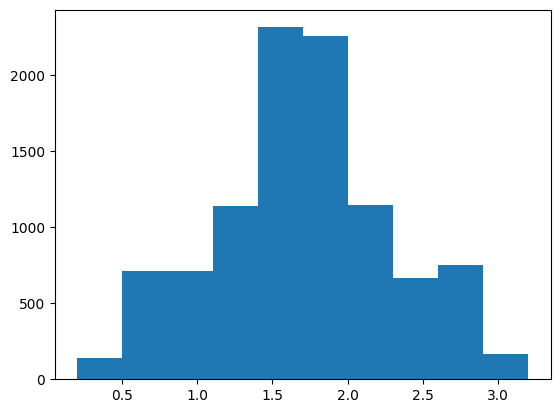

In [18]:
import matplotlib.pyplot as plt
lh_fsh = patients_df.loc["lh_fsh_ratio"]
plt.hist(lh_fsh, bins=10)
plt.show()

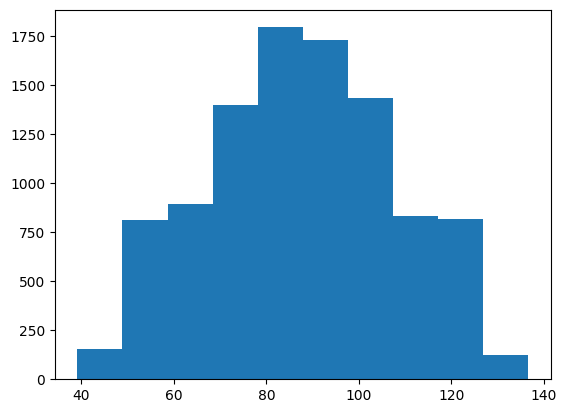

In [19]:
estradiol = patients_df.loc["estradiol"]
plt.hist(estradiol, bins=10)
plt.show()

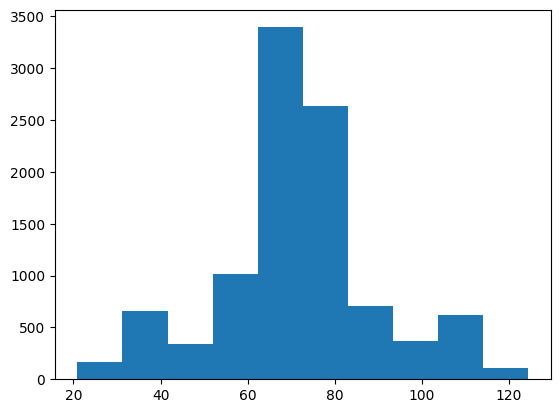

In [20]:
testosterone = patients_df.loc["testosterone"]
plt.hist(testosterone, bins=10)
plt.show()

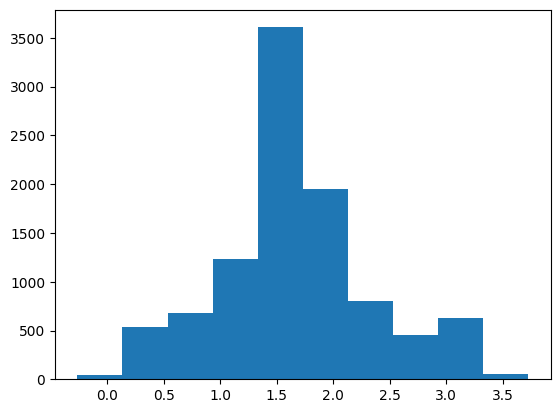

In [21]:
progesterone_17oh = patients_df.loc["progesterone_17oh"]
plt.hist(progesterone_17oh, bins=10)
plt.show()

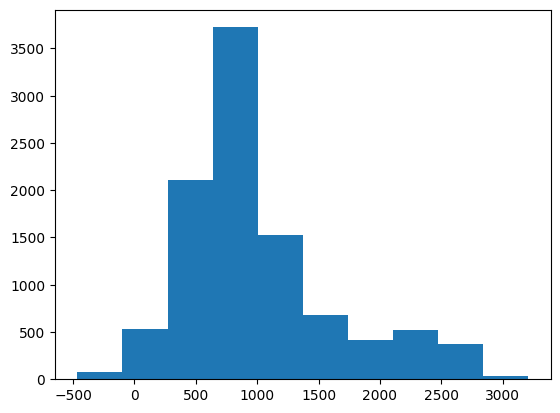

In [22]:
dheas = patients_df.loc["dheas"]
plt.hist(dheas, bins=10)
plt.show()

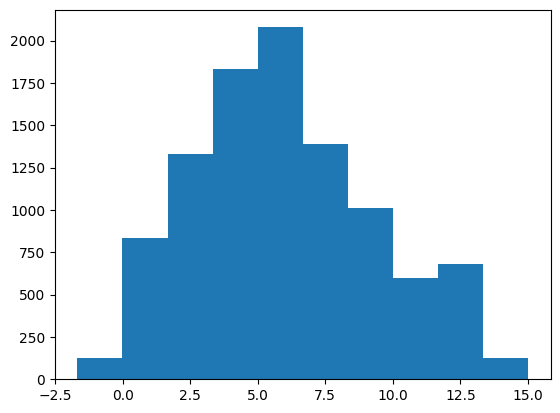

In [23]:
androstenedione = patients_df.loc["androstenedione"]
plt.hist(androstenedione, bins=10)
plt.show()

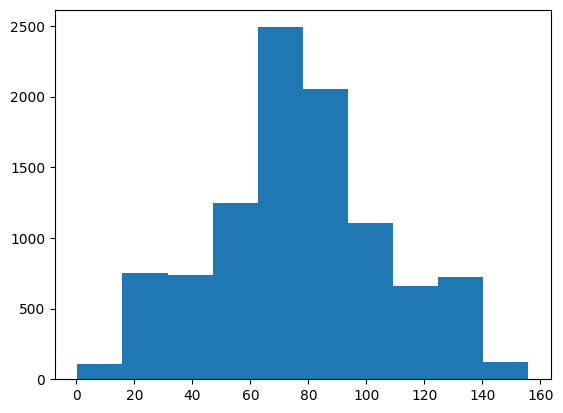

In [24]:
amh = patients_df.loc["amh"]
plt.hist(amh, bins=10)
plt.show()